# [ 서울 지하철 통계 분석 ]

### 1.대중교통 데이터 읽어오기

In [78]:
import csv

f=open('./data/subwayfee.csv', encoding='euc-kr')
data= csv.reader(f)
header = next(data)
print(header)

i=0
for row in data:
    print(row)
    if i >5:
        break
    i +=1
f.close()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['06-22', '1호선', '150', '서울역', '1150754', '1123193', '194717', '187155']
['06-22', '1호선', '151', '시청', '537067', '543569', '80671', '78279']
['06-22', '1호선', '152', '종각', '834173', '815704', '131987', '121717']
['06-22', '1호선', '153', '종로3가', '450317', '404106', '299617', '278151']
['06-22', '1호선', '154', '종로5가', '394420', '404105', '254236', '244555']
['06-22', '1호선', '155', '동대문', '212719', '198987', '117499', '118515']
['06-22', '1호선', '156', '신설동', '264825', '252339', '112362', '106855']


### 2.유임 승차 vs 무임 승차 비율 계산

In [79]:
max_rate = 0
rate= 0
i=0
for row in data:
    for i in range(4,8)
        row[i] = int(row[i])
    rate = row[4] / row[6]
    
    if rate > max_rate:
        max_rate = rate
print(max_rate)

SyntaxError: invalid syntax (404961949.py, line 5)

### 3.무임승차 인원이 0인 역 찾기

In [80]:
import	csv
f	=	open('./data/subwayfee.csv',	encoding='cp949')
data	=	csv.reader(f)
header	=	next(data)
max_rate = 0
rate	= 0
i =	0

for	row	in data:
    for	i in range(4,8):
        row[i]	=	int(row[i])	#	4,	5,	6,	7	컬럼값을 정수로 변환
    rate	=	row[4]	/	(row[4]	+	row[6])

    if	row[6]	==	0:	#	무임승차 인원[6]이 없는 역 출력
        print(row)



['06-22', '일산선', '1949', '지축', 10, 0, 0, 0]
['06-22', '경의선', '1296', '계양', 10, 0, 0, 0]
['06-22', '경의선', '1297', '검암', 2, 0, 0, 0]
['06-22', '6호선', '2615', '연신내', 31, 0, 0, 0]
['06-22', '6호선', '2649', '신내', 4, 0, 0, 0]
['06-22', '7호선', '2753', '까치울', 1, 0, 0, 0]
['06-22', '7호선', '2758', '상동', 1, 0, 0, 0]
['06-22', '7호선', '2761', '부평구청', 1, 0, 0, 0]


### 4.최대 무임 승차 비율 확인

In [81]:
import csv
f = open('./data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)
max_rate = 0
rate = 0

for	row	in data:
    for	i in range(4,8):
        row[i]	=	int(row[i])	
    
    if row[6] != 0:
        rate = (row[6]*100) / (row[4]+row[6])
        if rate > max_rate:
            max_rate =rate
            print(row, round(rate, 2), '%')
f.close()

['06-22', '1호선', '150', '서울역', 1150754, 1123193, 194717, 187155] 14.47 %
['06-22', '1호선', '153', '종로3가', 450317, 404106, 299617, 278151] 39.95 %
['06-22', '1호선', '157', '제기동', 218782, 209109, 263173, 281985] 54.61 %
['06-22', '경원선', '1916', '소요산', 32659, 25998, 62990, 56806] 65.86 %
['06-22', '7호선', '2756', '신중동', 0, 0, 1, 0] 100.0 %


### 5.최대 유임 승차 인원이 있는 역은?

In [82]:
import csv
f = open('./data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)
max_rate = 0
rate = 0

max_row = []
total_count = 0
max_total_num = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    total_count=row[4] + row[6]
    if (row[6] !=0) and (total_count >100000):
        rate = row[4] / total_count
        if rate > max_rate:
            max_rate = rate
            max_row = row
            max_total_num = total_count
            
print(max_row)
print(f"역이름: {max_row[3]}, 전체인원: {max_total_num}, 유임승차인원: {max_row[4]}, 유임승차비율: {round(max_rate, 2)} ")

['06-22', '2호선', '209', '한양대', 269240, 295829, 12481, 13227]
역이름: 한양대, 전체인원: 281721, 유임승차인원: 269240, 유임승차비율: 0.96 


### 6. 실습 : 유임 승차 비율이 50% 이하인 역

In [83]:
import csv
f = open('./data/subwayfee.csv', encoding='cp949')
data = csv.reader(f)
next(data)

min_rate = 0
rate = 0
min_row = []
total_count = 0
min_total_num = 0

for row in data:
    for i in [4,6]:
        row[i] = int(row[i])
    total_count = row[4] +row[6]
    if (row[6] !=0) and (total_count>10000):
        rate = row[4]/total_count
        if rate <= 0.5:
            print(row,round(rate,2))
            min_rate =rate
            min_row = row
            min_total_count = total_count
            
print(f'유임 승차 비율이 가장 낮은 역: {min_row[3]}\n전체인원: {min_total_count}\n유임승차인원: {min_row[4]}\n유임승차비율: {round(min_rate,2)}')

['06-22', '1호선', '157', '제기동', 218782, '209109', 263173, '281985'] 0.45
['06-22', '1호선', '159', '동묘앞', 122460, '131299', 146455, '147539'] 0.46
['06-22', '경원선', '1916', '소요산', 32659, '25998', 62990, '56806'] 0.34
['06-22', '중앙선', '1218', '원덕', 5854, '5749', 6959, '6739'] 0.46
['06-22', '중앙선', '1219', '용문', 34168, '34477', 38467, '38202'] 0.47
유임 승차 비율이 가장 낮은 역: 용문
전체인원: 72635
유임승차인원: 34168
유임승차비율: 0.47


### 7. 파이 차트 생성

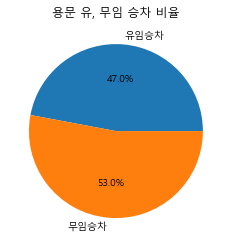

In [84]:
import platform
import matplotlib.pyplot as plt
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.title(min_row[3] + " 유, 무임 승차 비율")
label = ['유임승차' , '무임승차']
values = [min_row[4], min_row[6]] 

plt.pie(values, labels =label, autopct = '%.1f%%') 
plt.show()

### 8.모든 역의 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원 분석

### 9. 전체 지하철역 승하차 인원 분석 및 저장

In [85]:
label = ['유임승차',	'유임하차',	'무임승차',	'무임하차']
c =  ['#14CCC0',	'#389993',	'#FF1C6A',	'#CC14AF']
pic_count = 0
with open('./data/subwayfee.csv', encoding = 'cp949') as f:
    data =csv.reader(f)
    next(data)
    next(data)
    if(platform.system()	==	'Windows'):
        plt.rc('font',	family='Malgun Gothic')
    else:
        plt.rc('font',	family='AppleGothic')

    for	row	in	data:
        for	i in	range(4,	8):
            row[i]	=	int(row[i])
            
        plt.figure(dpi=200)	#	저장할 그림파일의 dpi	설정
        plt.title(row[3]	+' '+	row[1])
        plt.pie(row[4:8],	labels=label,	colors=c,	autopct =	'%.1f%%')
        plt.savefig(row[3]	+' '+	row[1]	+	'.png')
        plt.close()	#	파일 닫기
        
        pic_count +=	1
        if	pic_count >=	10:
            break       

### 10. 데이터 정수 변환 
- map(function, iterable)  
- map(적용할 함수 이름, 적용할 데이터 이름)

In [86]:
def func(x):
    return x**2

a = [1,2,3,4]
a = list(map(func,a))
print(a)

data =['1','2','3','4']
data = list(map(int,data))
print(f'{data}, \ndata[0] type : {type(data[0])}')

[1, 4, 9, 16]
[1, 2, 3, 4], 
data[0] type : <class 'int'>


### 11. 시간대별 지하철 이용 인원 수

In [87]:
import csv

result = []
total_number = 0

with open('./data/subwaytime_make.csv') as f:
    data=csv.reader(f)
    next(data) # 헤더 2줄 건너뜀
    next(data)
    
    for row in data:
        row[4:] = map(int,row[4:])
        total_number += row[4]
        result.append(row[4])
        
print(f'총 지하철 역의 수: {len(result)}')
print(f'새별 4시의 승차인원: {total_number}')

총 지하철 역의 수: 615
새별 4시의 승차인원: 135398


### 12. 새벽4시 지하철 이용 인원 수 (그래프)

새벽 4시 승차 인원수: 135398
최대 승차역: ('구로', 11784)


<BarContainer object of 615 artists>

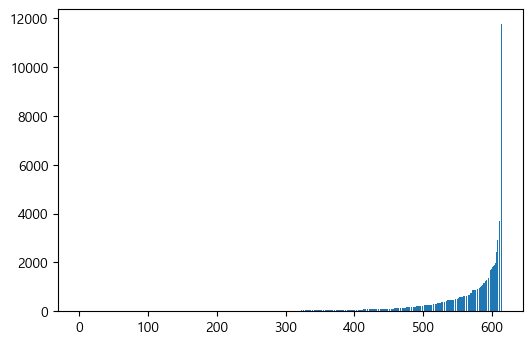

In [88]:
import csv
import matplotlib.pyplot as plt

with open('./data/subwaytime_make.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)
    result=[]
    total_number = 0
    max_num = 0
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])
        if row[4] > max_num:
            max_num = row[4]
            max_station = row[3]

print(f'새벽 4시 승차 인원수: {total_number}')
print(f'최대 승차역: {max_station, max_num}')

result.sort()
plt.figure(dpi=100)
plt.bar(range(len(result)),result)



### 13. 출근 시간대 지하철 이용 현황 

최대 승차 인원역:('신림(2호선)', 638753) 


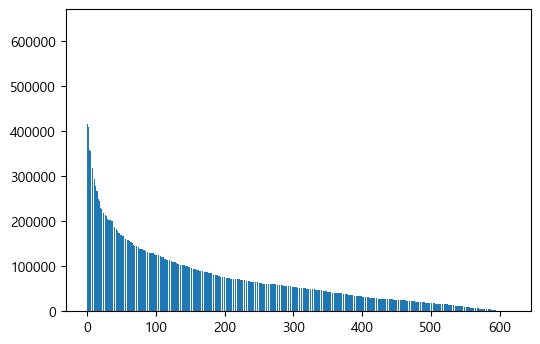

In [89]:
with open('./data/subwaytime_make.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)
    result=[]
    total_number = 0
    max_num = 0
    max_station = ''
    
    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2])
        result.append(row_sum)
        if row_sum> max_num:
            max_num = row_sum
            max_station = row[3] +'(' + row[1] + ')'

print(f'최대 승차 인원역:{max_station, max_num} ')
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.show()

### 14. 시간대별 가장 많이 승차하는 역 정보 분석

In [90]:
with open('./data/subwaytime_make.csv') as f:
    data=csv.reader(f)
    next(data)
    next(data)
    
    max=[0] * 23  # 새벽 3시는 지하철 운행 안함. 
    total_number = 0
    max_num = 0
    max_station = [''] * 23
    xtick_list = []
    
    # x축 시간 설정 
    for i in range(4,27):
        n= i % 24
        xtick_list.append(str(n))
    
    #     
    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j * 2 + 4] # 승차 데이터만 가져오기 위해서.
            if a > max[j]:
                max[j] = a
                max_station[j] = xtick_list[j] + '시' + row[3]
                
    for i in range(len(max)):
        print(f'{max[i]}, {max_station[i]}')
        if (i+1) % 4 == 0:
            print()            
    
    

11784, 4시구로
38809, 5시신림
73523, 6시신림
188110, 7시신림

281017, 8시신림
169626, 9시신림
91989, 10시신림
77496, 11시신림

84383, 12시잠실(송파구청)
95697, 13시강남
106394, 14시강남
131625, 15시강남

154526, 16시강남
231839, 17시강남
314775, 18시강남
196425, 19시강남

155347, 20시강남
180108, 21시강남
176473, 22시강남
81016, 23시강남

12407, 0시강남
8, 1시건대입구
1, 2시동묘앞


### 15. 판다스 활용
- 출퇴근 이용현황
- 컬럼 데이터 타입 확인( 컬럼불러오기 : 멀티인덱스의 경우, 튜플형식으로 접근)
- 천 단위 콤마 제거
- 데이터 타입 변경
- 각 행(지하철 역)의 승차 인원 수 합 계산
- 최대,최소 인덱스 찾기
- 그래프 생성

In [91]:
import pandas as pd
!pip install xlrd
df= pd.read_excel('./data/subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0,1])
df

Defaulting to user installation because normal site-packages is not writeable


사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59         \
    Unnamed: 3_level_1                승차  하차                승차     하차   
0                  서울역               646  24             8,433  7,694   
1                   시청               271   7             3,133  4,802   
2                   종각                91   9             4,007  3,960   
3                 종로3가               190  12             3,882  3,261   
4                 종로5가                34   0             1,730  3,909   
..                 ...               ...  ..               ...    ...   
610                 당곡                 0   0             1,061    118   
611                 신림                 2   1               651    153   
612                 서원                 2   1             1,287    151   
613            서울대벤처타운                10   3             3,314    166   
614           관악산(서울대)                 2   5               475    742   

    06:00:00~06:59:59          ... 23:00:00~23:59:59 00:00:00~00:59:59         \
                   승차      하차  ...                하차                승차     하차   
0              12,608  46,963  ...            15,480               158  1,332   
1               3,321  23,621  ...             2,938                72    422   
2               3,682  22,533  ...             3,590               315    394   
3               3,570  14,038  ...             4,119               310    843   
4               2,986  16,406  ...             2,628                98    668   
..                ...     ...  ...               ...               ...    ...   
610             2,650     704  ...             2,710               156    637   
611               853     488  ...             2,023               177    629   
612             2,552     513  ...             3,281                68    782   
613             5,162   1,676  ...             7,279               180  1,974   
614             1,258   1,712  ...             1,224                90    412   

    01:00:00~01:59:59     02:00:00~02:59:59    03:00:00~03:59:59     \
                   승차  하차                승차 하차                승차 하차   
0                   1   4                 0  1                 0  0   
1                   0   2                 0  0                 0  0   
2                   0   1                 0  0                 0  0   
3                   3   3                 0  0                 0  0   
4                   0   0                 0  0                 0  0   
..                ...  ..               ... ..               ... ..   
610                 0   0                 0  0                 0  0   
611                 0   1                 0  0                 0  0   
612                 2   2                 0  0                 0  0   
613                 1  40                 0  0                 0  0   
614                 1  33                 0  0                 0  0   

                    작업일시  
     Unnamed: 52_level_1  
0    2022-07-03 09:48:05  
1    2022-07-03 09:48:05  
2    2022-07-03 09:48:05  
3    2022-07-03 09:48:05  
4    2022-07-03 09:48:05  
..                   ...  
610  2022-07-03 09:48:05  
611  2022-07-03

In [92]:
df.columns

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [93]:
df[('호선명','Unnamed: 1_level_1')]

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
610    신림선
611    신림선
612    신림선
613    신림선
614    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 615, dtype: object

In [94]:
commute_time_df = df.iloc[:,[1,3,10,12,14]]
commute_time_df

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,"39,233","65,106","54,833"
1,1호선,시청,"6,647","8,294","9,211"
2,1호선,종각,"5,814","9,612","11,847"
3,1호선,종로3가,"4,746","8,589","13,179"
4,1호선,종로5가,"5,020","8,550","11,925"
...,...,...,...,...,...
610,신림선,당곡,"7,708","11,603","6,862"
611,신림선,신림,"3,099","5,402","2,941"
612,신림선,서원,"8,427","12,646","7,590"


In [95]:
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object

In [96]:
commute_time_df[('07:00:00~07:59:59',   '승차')]	=   commute_time_df[('07:00:00~07:59:59',   '승차')].apply(lambda	x	:	x.replace(',',''))
commute_time_df[('08:00:00~08:59:59',   '승차')]	=	commute_time_df[('08:00:00~08:59:59',   '승차')].apply(lambda	x	:	x.replace(',',''))
commute_time_df[('09:00:00~09:59:59',   '승차')]	=	commute_time_df[('09:00:00~09:59:59',   '승차')].apply(lambda	x	:	x.replace(',',''))
commute_time_df

C:\Users\alstn\AppData\Local\Temp\ipykernel_14748\2775104927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('07:00:00~07:59:59',   '승차')]	=   commute_time_df[('07:00:00~07:59:59',   '승차')].apply(lambda	x	:	x.replace(',',''))
C:\Users\alstn\AppData\Local\Temp\ipykernel_14748\2775104927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('08:00:00~08:59:59',   '승차')]	=	commute_time_df[('08:00:00~08:59:59',   '승차')].apply(lambda	x	:	x.replace(',',''))
C:\Users\alstn\AppDa

,호선명,지하철역,07:00:00~07:59:59,08:00:00~08:59:59,09:00:00~09:59:59
,Unnamed: 1_level_1,Unnamed: 3_level_1,승차,승차,승차
0,1호선,서울역,39233,65106,54833
1,1호선,시청,6647,8294,9211
2,1호선,종각,5814,9612,11847
3,1호선,종로3가,4746,8589,13179
4,1호선,종로5가,5020,8550,11925
...,...,...,...,...,...
610,신림선,당곡,7708,11603,6862
611,신림선,신림,3099,5402,2941
612,신림선,서원,8427,12646,7590


In [97]:
commute_time_df =	commute_time_df.astype({('07:00:00~07:59:59',	'승차'):'int64'})
commute_time_df =	commute_time_df.astype({('08:00:00~08:59:59',	'승차'):'int64'})
commute_time_df =	commute_time_df.astype({('09:00:00~09:59:59',	'승차'):'int64'})
commute_time_df.dtypes

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object

In [110]:
row_sum_df = commute_time_df.sum(axis=1)
passenger_number_list =row_sum_df.to_list()
# passenger_number_list 

C:\Users\alstn\AppData\Local\Temp\ipykernel_14748\2895412011.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_sum_df = commute_time_df.sum(axis=1)


0      159172
1       24152
2       27273
3       26514
4       25495
        ...  
610     26173
611     11442
612     28663
613     51706
614     11914
Length: 615, dtype: int64

In [104]:
max_number = row_sum_df.max(axis=0) # 해당 열에서 최대값 찾기
max_number

638753

In [111]:
max_index =row_sum_df.idxmax()
max_line, max_station = df.iloc[max_index,[1,3]] # 1.호선, 3.지하철명

print(f'출근 시간대 최대 승차 인원역: {max_line},{max_station},{max_number}')

출근 시간대 최대 승차 인원역: 2호선,신림,638753
